<a href="https://colab.research.google.com/github/elnemr19/Rainfall-Prediction/blob/main/Rain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
url ='https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package'

# Business Understanding


### About Dataset

-Ever wondered if you should carry an umbrella tomorrow? With this dataset, you can predict **next-day** rain by training classification models on the target variable **RainTomorrow**

### Explination of columns :

**1- Date:**

Type: Date

Description: Represents the date of the weather observation in the format YYYY-MM-DD.

**2- Location:**

Type: Categorical

Description: The name of the location where the weather data was recorded.

**3- MinTemp:**

Type: Numerical (Float)

Description: The minimum temperature recorded on the day, in degrees Celsius.

**4- MaxTemp:**

Type: Numerical (Float)

Description: The maximum temperature recorded on the day.

**5- Rainfall:**

Type: Numerical (Float)

Description: The total rainfall recorded for the day, in millimeters.

**6- Evaporation:**

Type: Numerical (Float)

Description: The evaporation level for the day, in millimeters. Evaporation is the process by which water changes from a liquid to a gas.

**7- Sunshine:**

Type: Numerical (Float)

Description: The number of hours of bright sunshine recorded for the day.

**8- WindGustDir:**

Type: Categorical

**Description** : The direction from which the **strongest** wind gust was recorded during the day, using compass directions (e.g., N, S, E, W).
Example: ( N: North ,NNE: North-Northeast ,NE: Northeast ,ENE: East-Northeast ,E: East ,ESE: East-Southeast ,SE: Southeast ,SSE: South-Southeast ,S: South ,SSW: South-Southwest ,SW: Southwest ,WSW: West-Southwest ,W: West ,WNW: West-Northwest ,NW: Northwest ,NNW: North-Northwest     )

**9- WindGustSpeed:**

Type: Numerical (Integer)

Description: The speed of the **strongest** wind gust recorded during the day, in kilometers per hour.

**10- WindDir9am:**

Type: Categorical

Description: The direction of the wind at 9 AM, using compass directions.

**11- WindDir3pm:**


**12- WindSpeed9am:**



**13- WindSpeed3pm:**



**14- Humidity9am:**

Type: Numerical (Integer)

Description: The relative humidity percentage at 9 AM.

**15 -Humidity3pm:**


**16- Pressure9am:**

Type: Numerical (Float)

Description: The atmospheric pressure at 9 AM, in hectopascals.

**17- Pressure3pm:**


**18- Cloud9am:**

Type: Numerical (Integer)
Description: The fraction of the sky covered by clouds at 9 AM, measured in oktas (eighths of the sky).

**19- Cloud3pm:**

Type: Numerical (Integer)
Description: The fraction of the sky covered by clouds at 3 PM, measured in oktas.

**20- Temp9am:**

Type: Numerical (Float)
Description: The temperature at 9 AM, in degrees Celsius.

**21 -Temp3pm:**

Type: Numerical (Float)

Description: The temperature at 3 PM, in degrees Celsius.

**22- RainToday:**

Type: Categorical (Binary: "Yes"/"No")

Description: Indicates whether it rained today (Yes) or not (No).

**23- RISK_MM:**

Type: Numerical (Float)

Description: The amount of rain predicted for the next day, in millimeters.

**24- RainTomorrow:**

Type: Categorical (Binary: "Yes"/"No")

Description: The target variable, indicating whether it rained the next day (Yes) or not (No).



## Initial Data Preparation

In [ ]:
#!kaggle datasets download -d jsphyg/weather-dataset-rattle-package

In [ ]:
#!unzip /content/weather-dataset-rattle-package.zip

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder ,FunctionTransformer ,RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split ,cross_val_score, KFold ,RepeatedKFold
from sklearn.ensemble import RandomForestClassifier
import joblib


from sklearn.metrics import accuracy_score ,classification_report ,roc_curve, auc ,precision_recall_curve
import tensorflow as tf

In [ ]:
Data =pd.read_csv(r'/content/weatherAUS.csv')

df =Data.copy()
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(145460, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
df['Date'].dtypes

dtype('O')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df.drop('Date' ,axis=1 ,inplace =True)

In [ ]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

179


## EDA

<Axes: ylabel='count'>

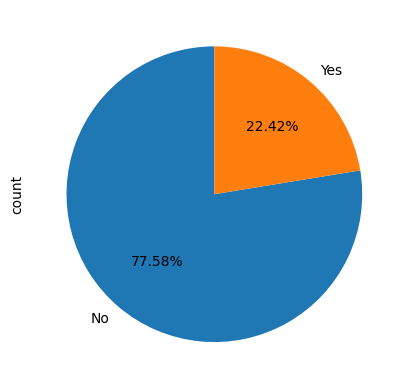

In [ ]:
df['RainTomorrow'].value_counts().plot.pie(autopct='%2.2f%%', startangle=90)

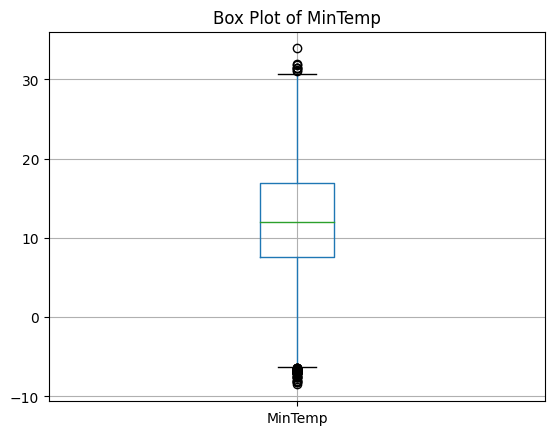

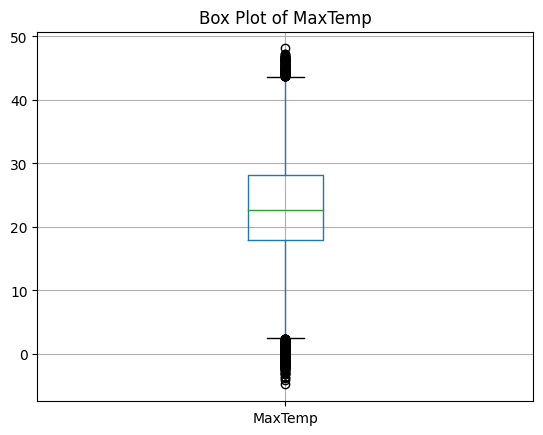

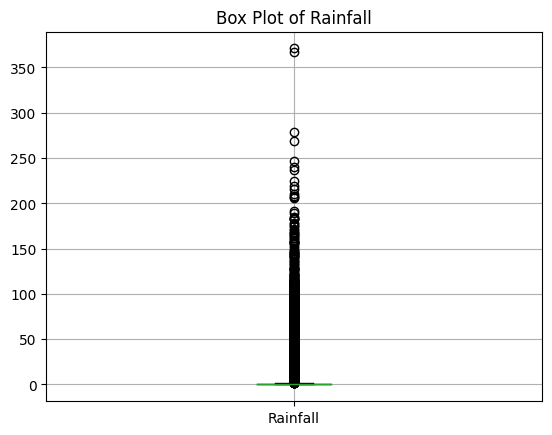

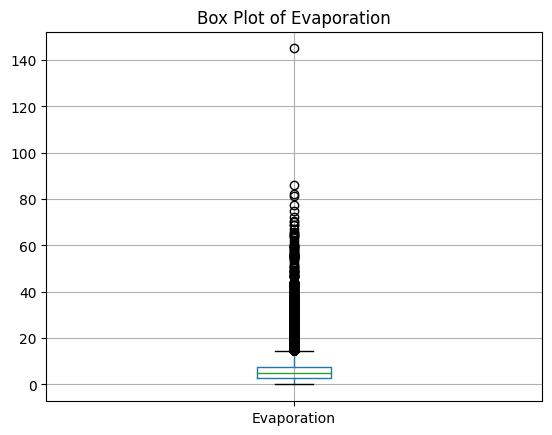

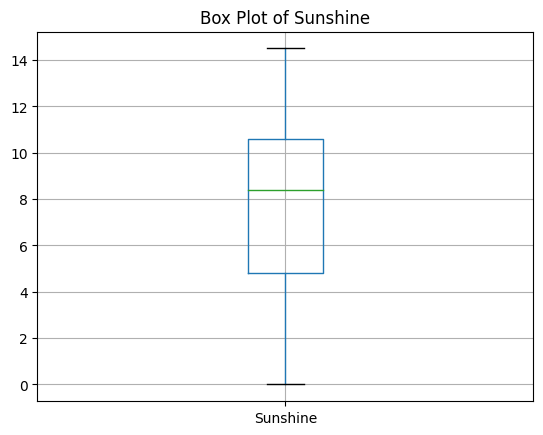

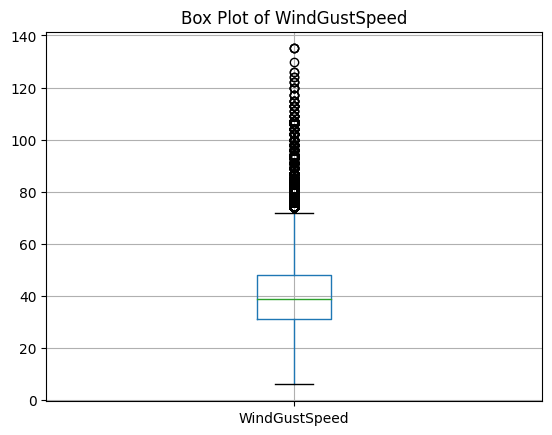

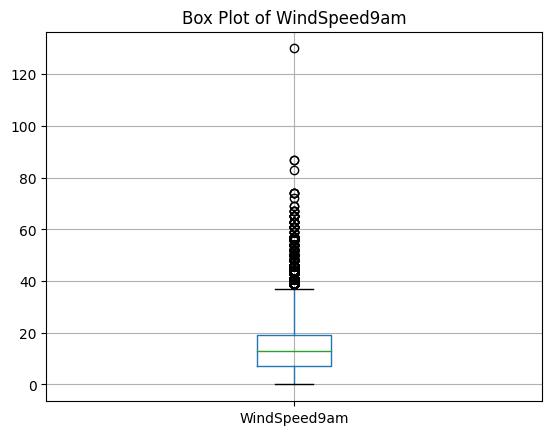

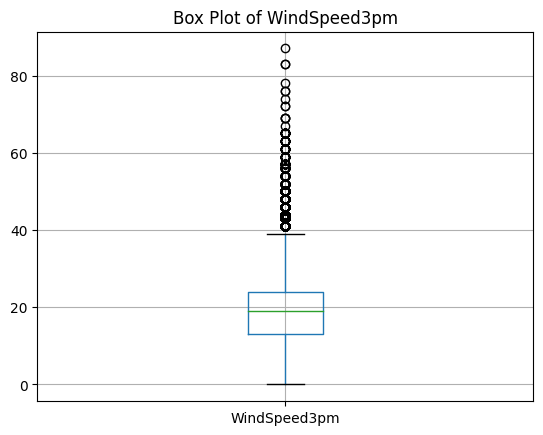

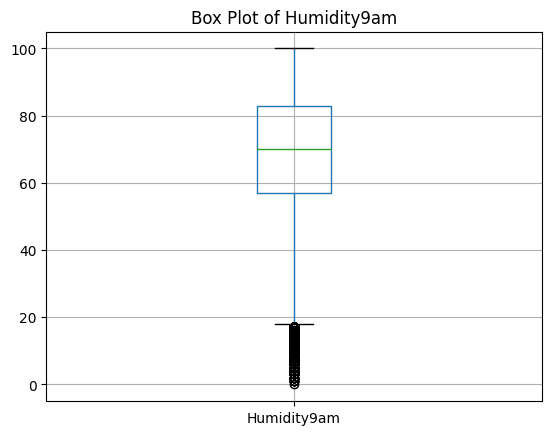

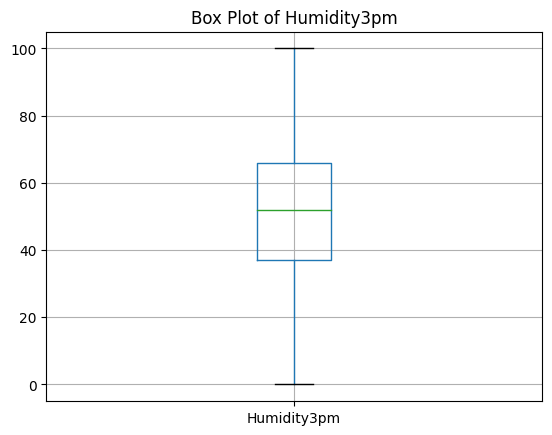

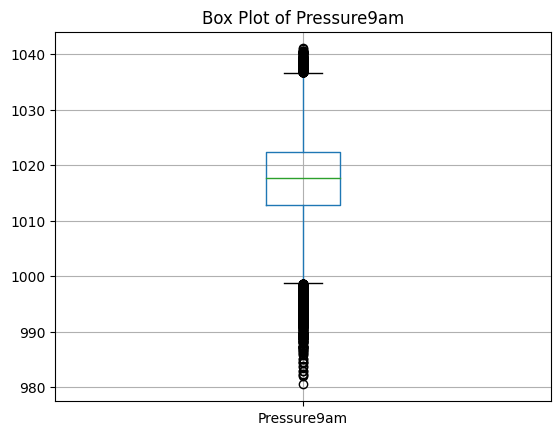

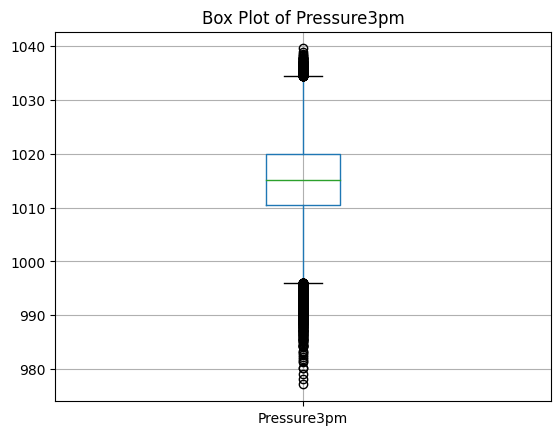

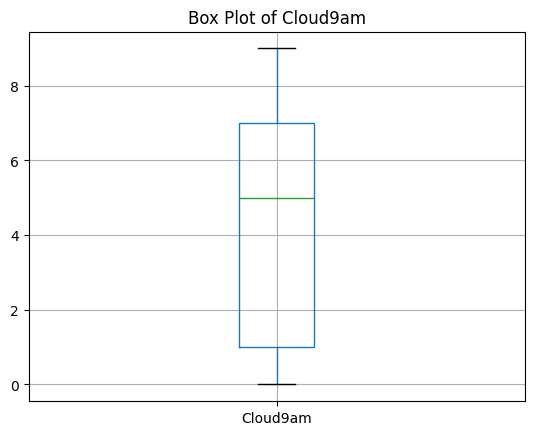

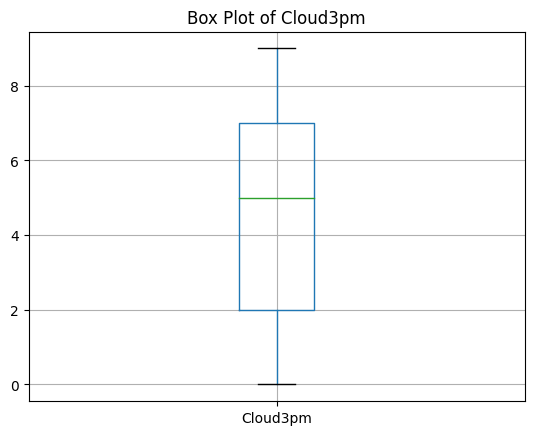

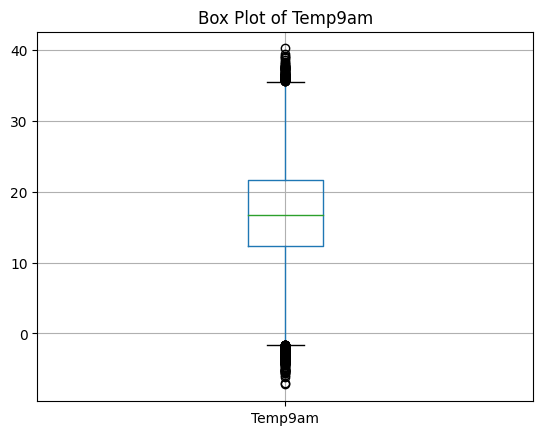

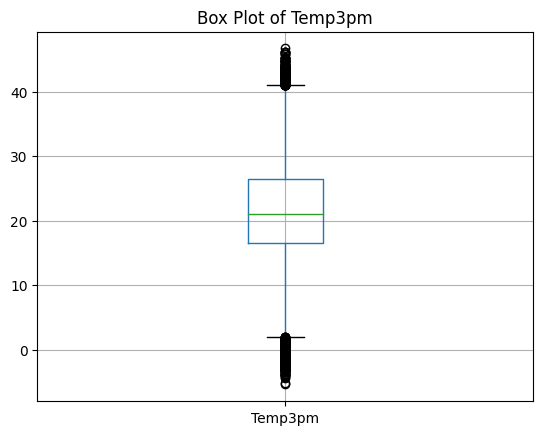

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns


for col in df[numeric_cols]:
    df.boxplot(column=col)
    plt.title(f'Box Plot of {col}')
    plt.show()

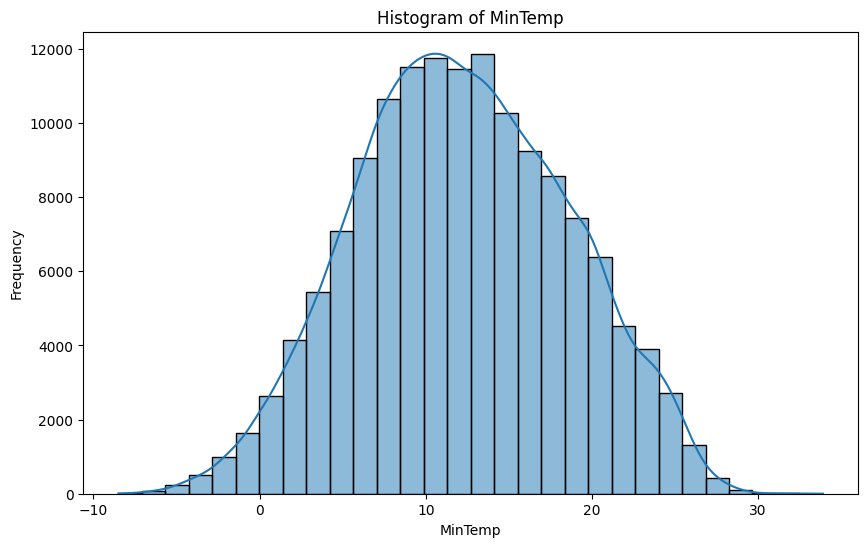

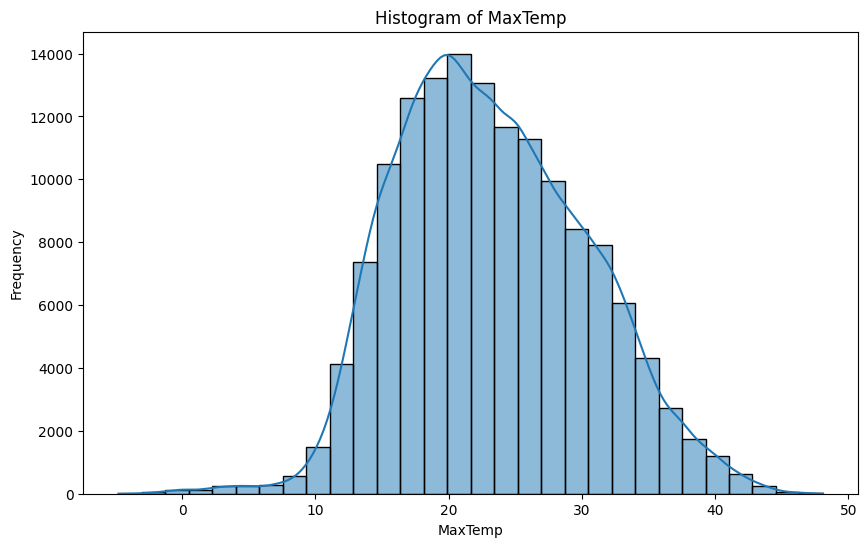

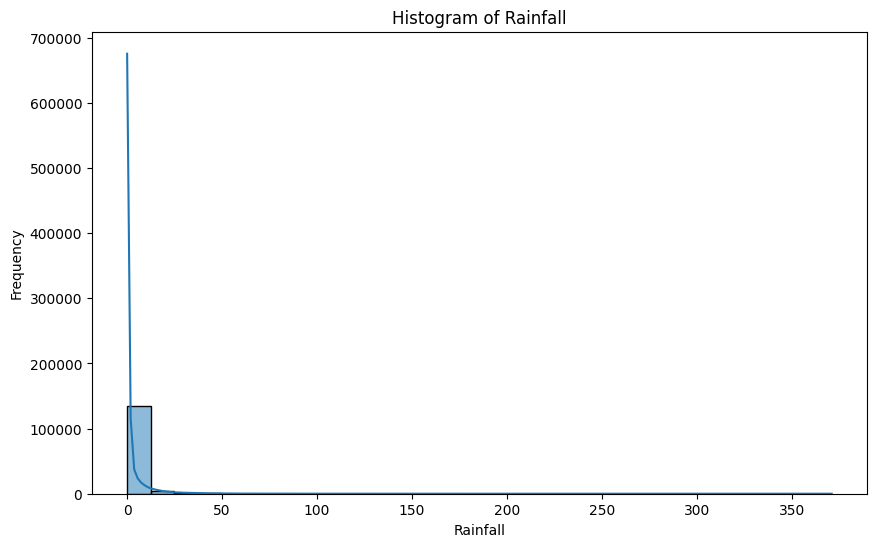

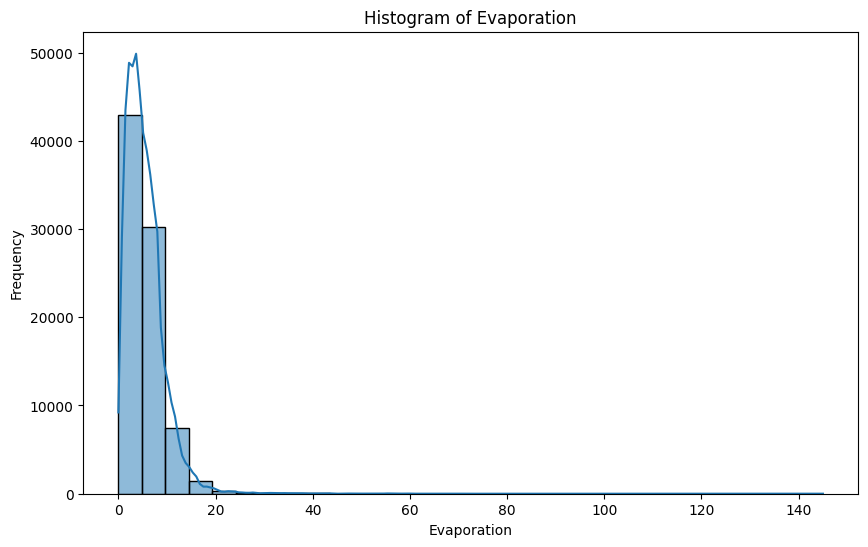

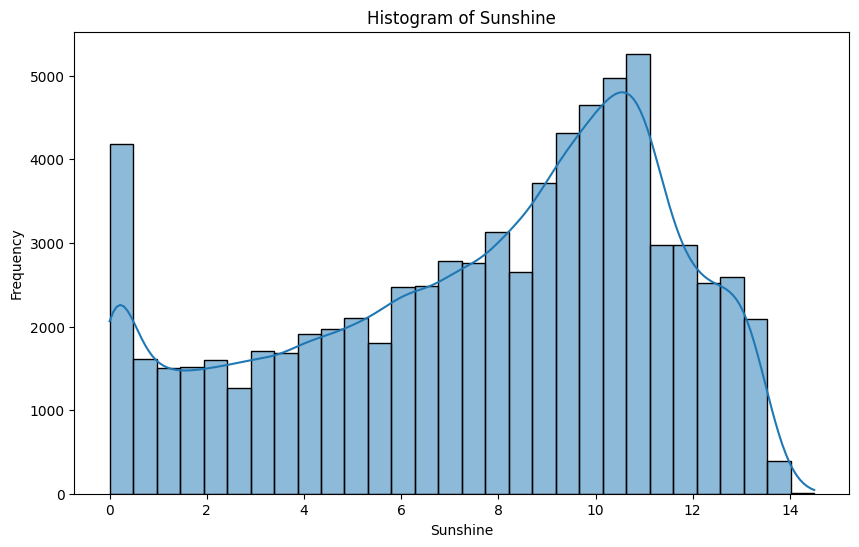

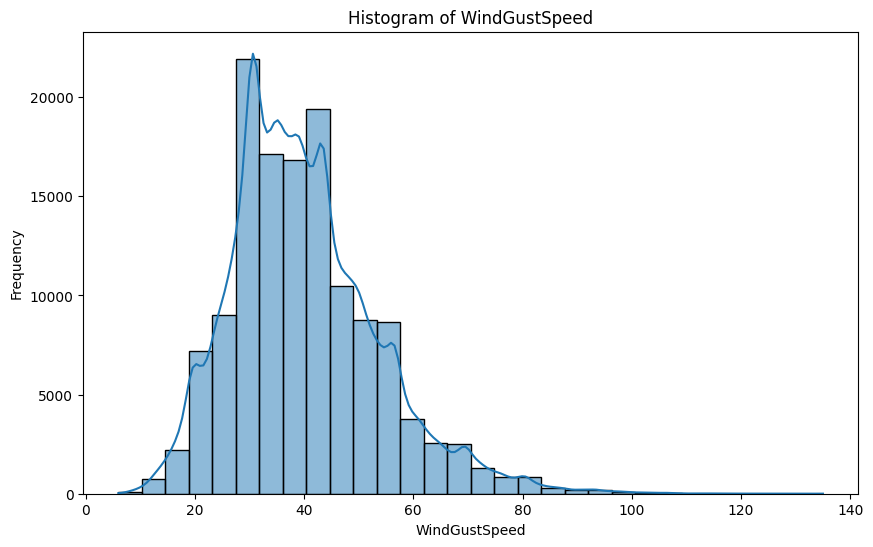

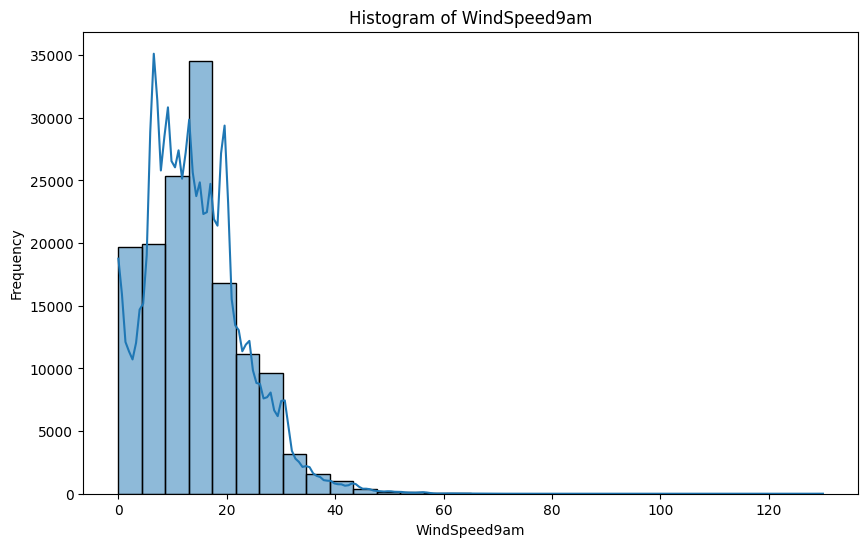

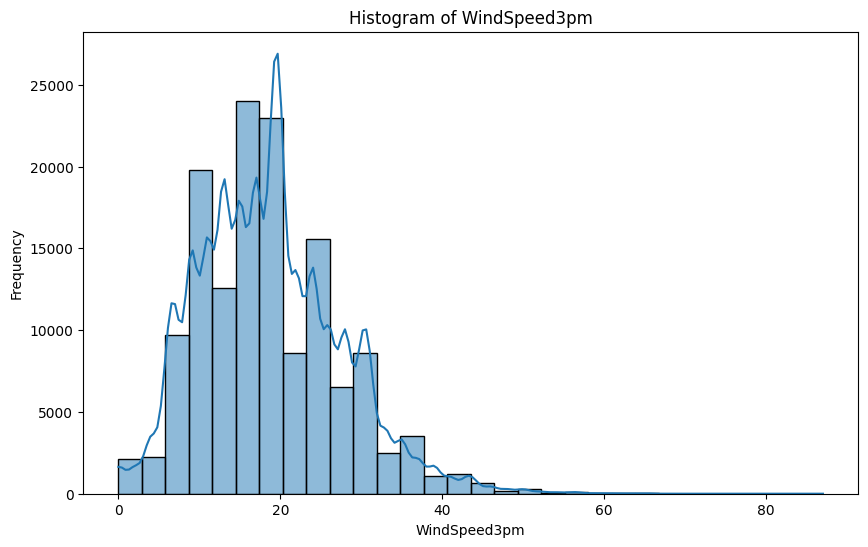

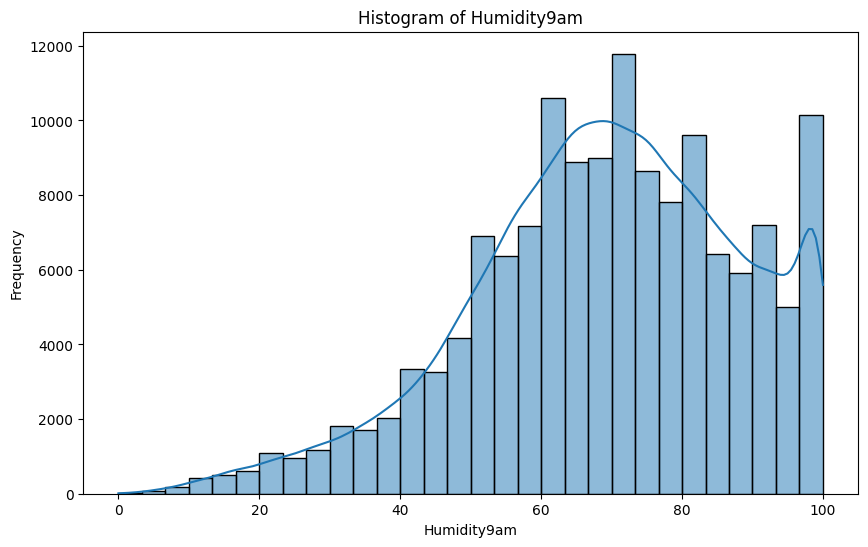

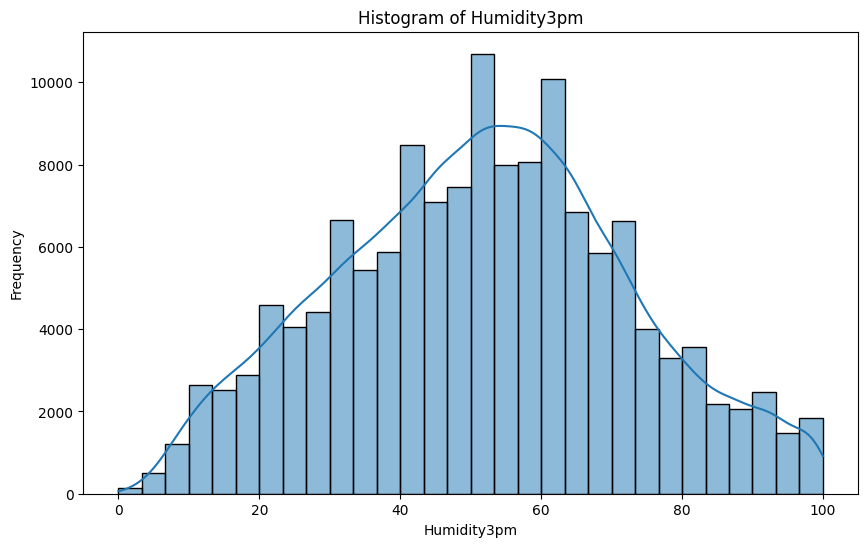

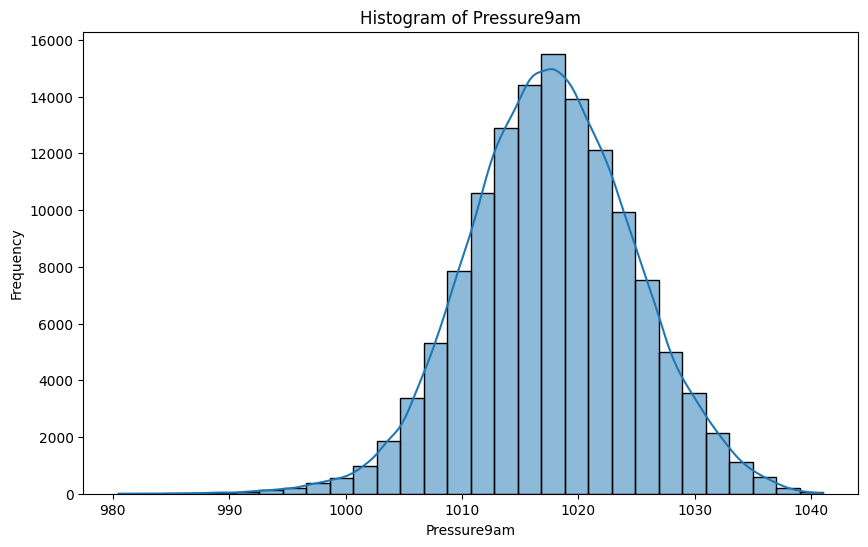

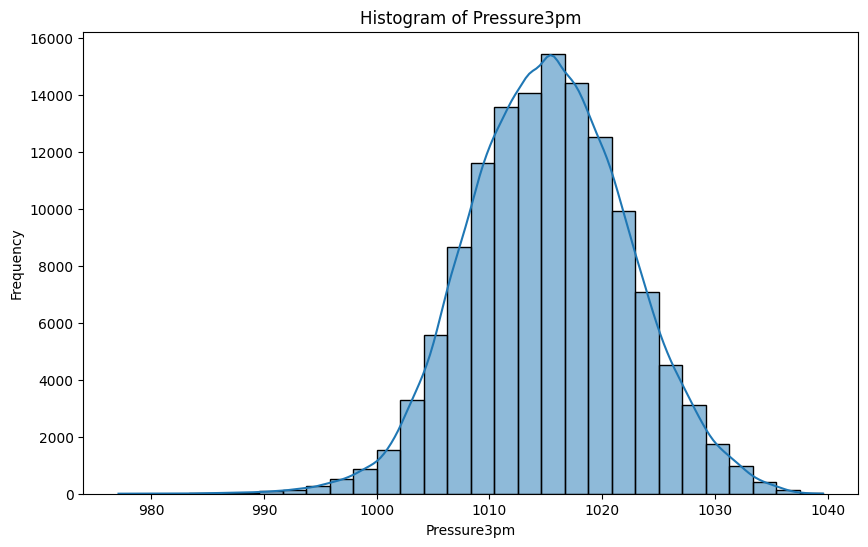

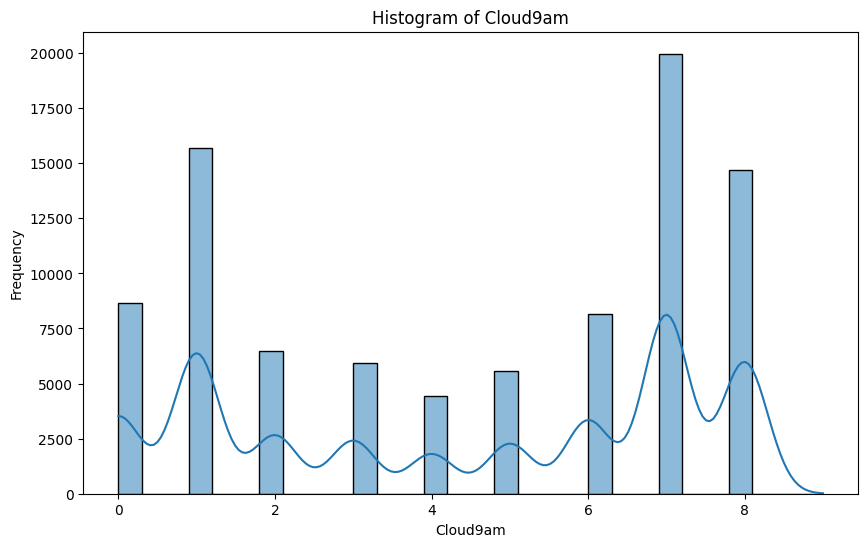

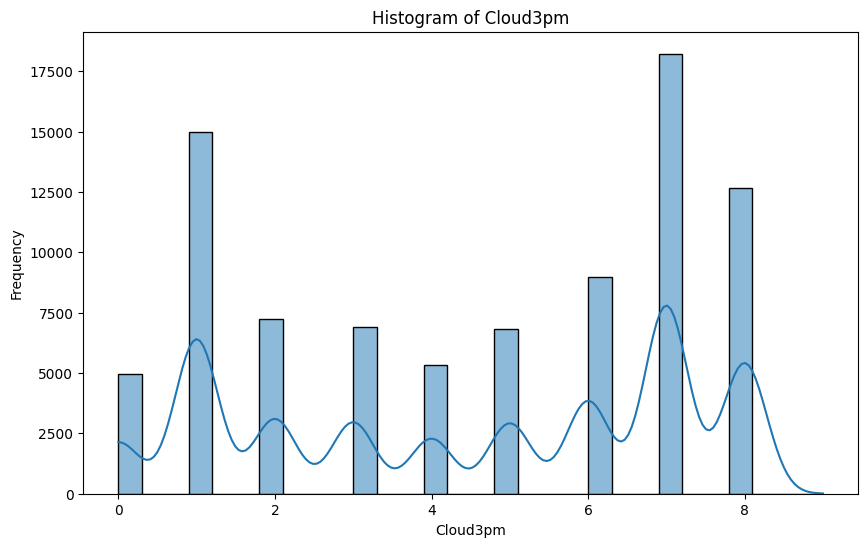

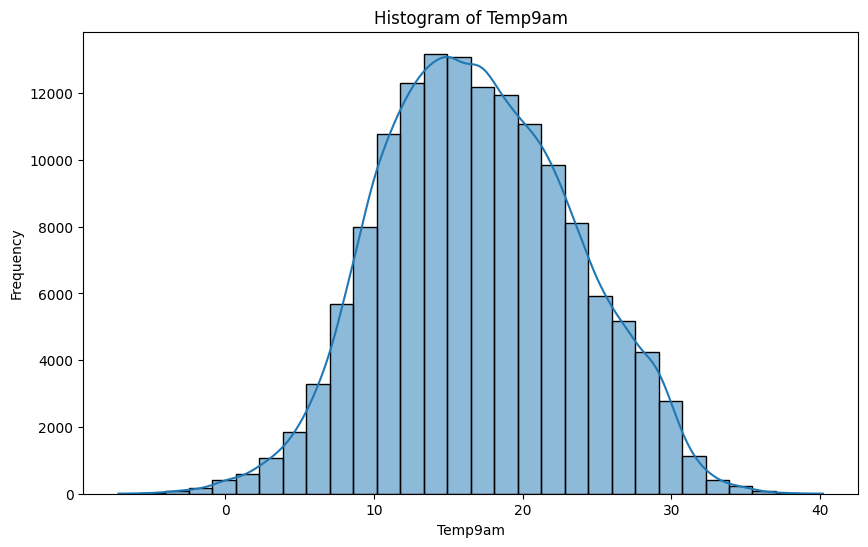

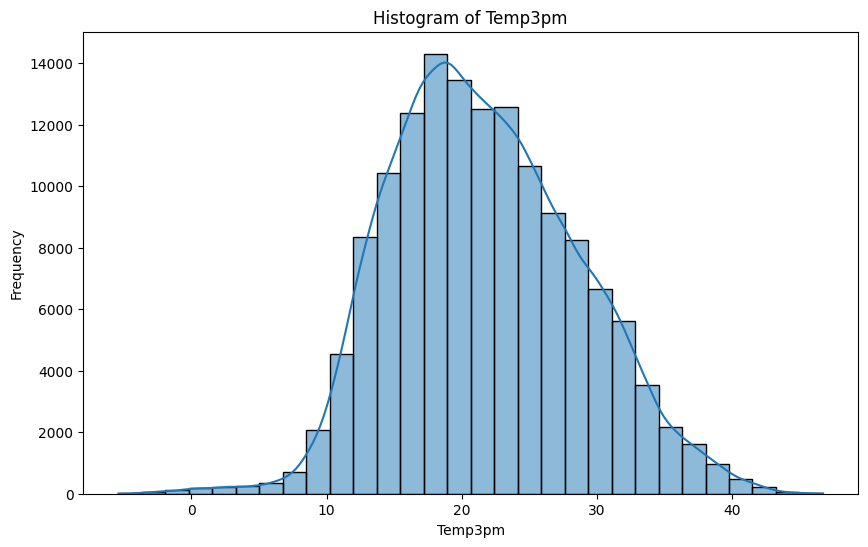

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns


for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=30)  # kde=True adds a Kernel Density Estimate line to the histogram
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

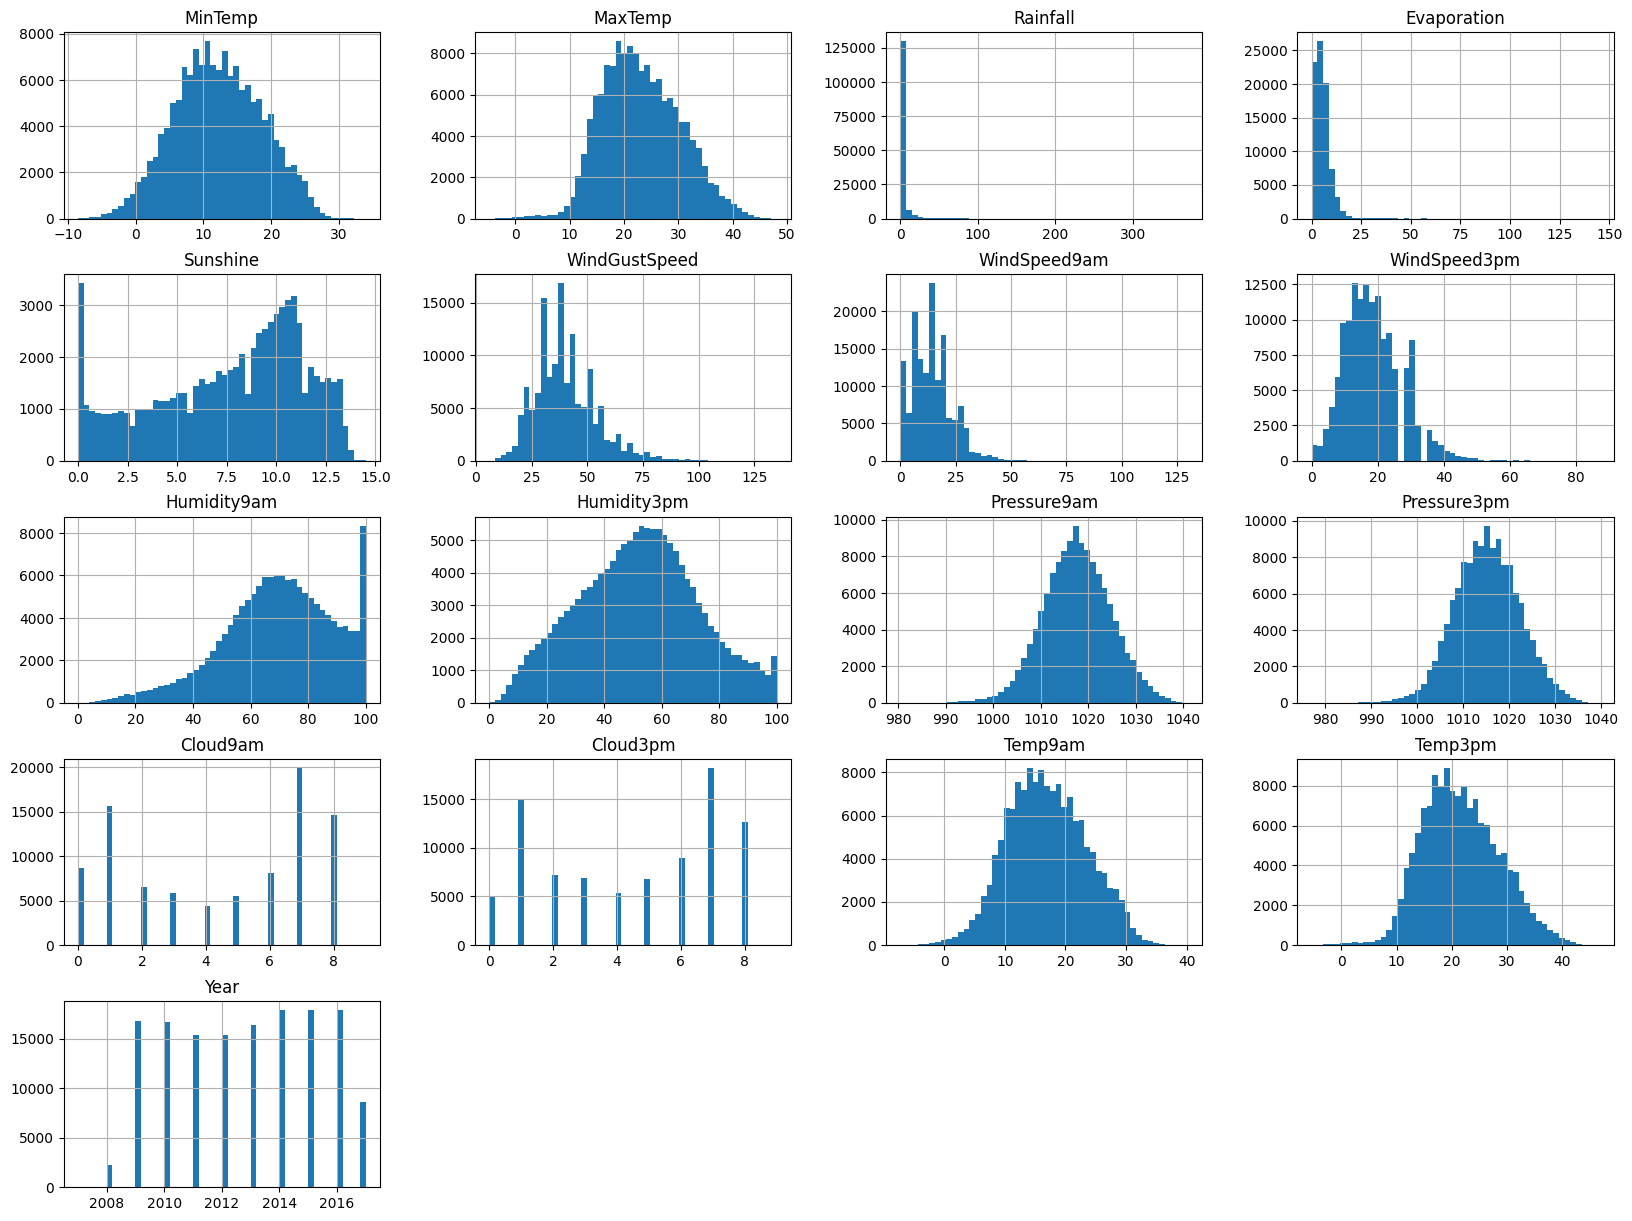

In [ ]:

df.hist(bins=50, figsize=(20, 15))
plt.show()

<ipython-input-53-9d9e026253ff>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts[col], y=counts['count'], palette='viridis')


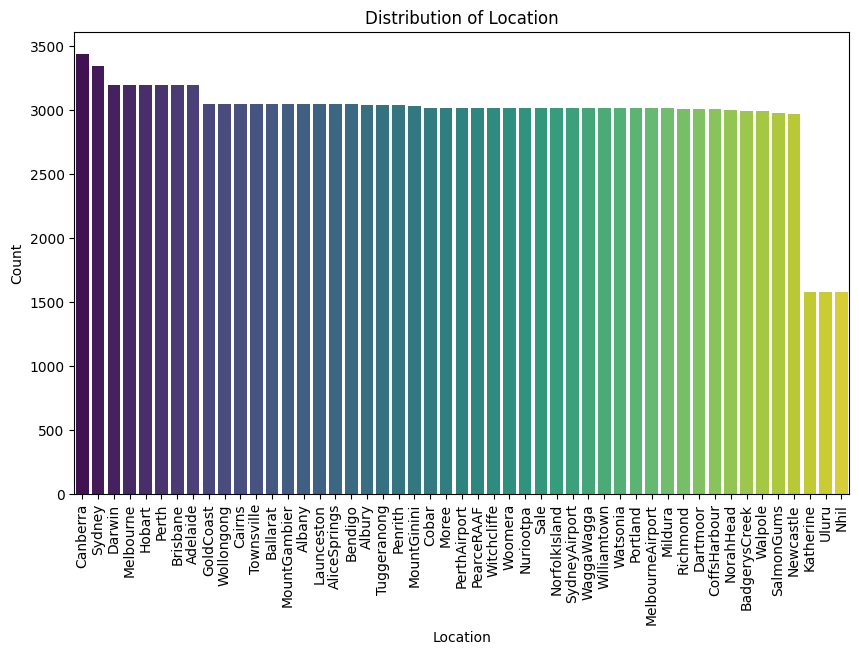

<ipython-input-53-9d9e026253ff>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts[col], y=counts['count'], palette='viridis')


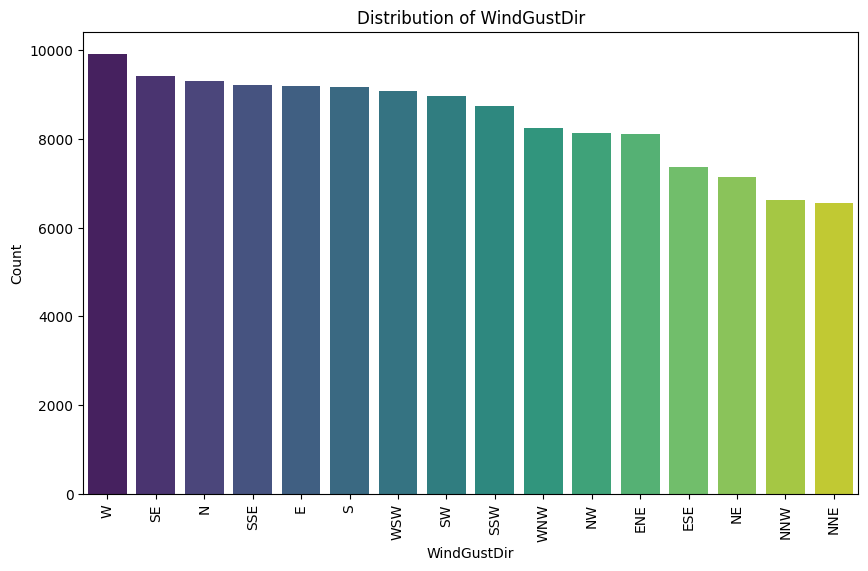

<ipython-input-53-9d9e026253ff>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts[col], y=counts['count'], palette='viridis')


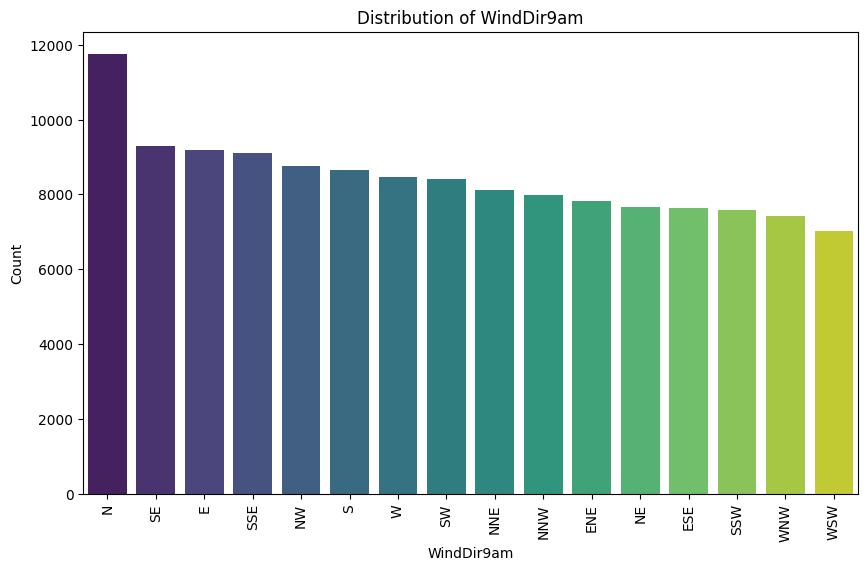

<ipython-input-53-9d9e026253ff>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts[col], y=counts['count'], palette='viridis')


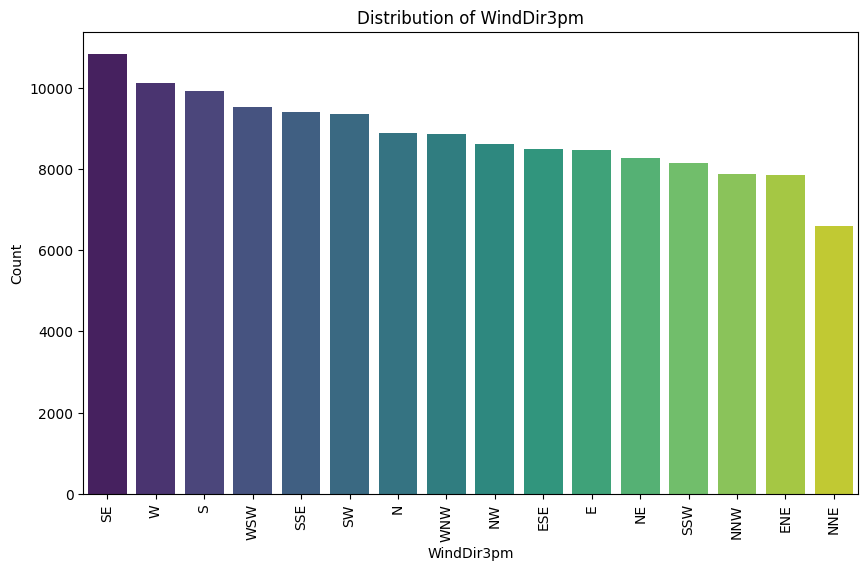

<ipython-input-53-9d9e026253ff>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts[col], y=counts['count'], palette='viridis')


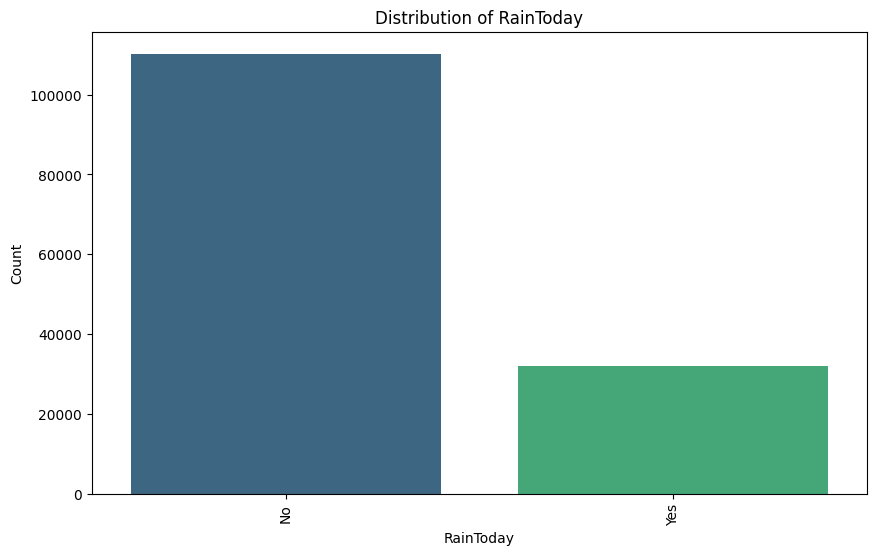

<ipython-input-53-9d9e026253ff>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts[col], y=counts['count'], palette='viridis')


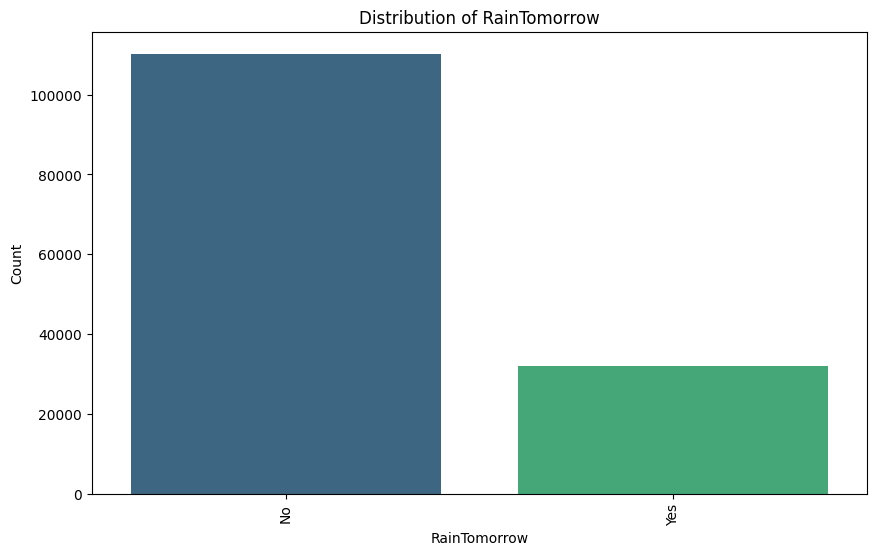

In [ ]:
catigorical_col = df.select_dtypes(include=['O']).columns

for col in catigorical_col:
    # Get value counts
    counts = df[col].value_counts()

    # Reset index to remove duplicate index labels
    counts = counts.reset_index()
    counts.columns = [col, 'count']

    plt.figure(figsize=(10, 6))
    sns.barplot(x=counts[col], y=counts['count'], palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

##Habdle Null values

In [ ]:
df.isna().sum()

,0
Location,0
MinTemp,1306
MaxTemp,1083
Rainfall,3114
Evaporation,62612
Sunshine,69657
WindGustDir,10147
WindGustSpeed,10084
WindDir9am,10387
WindDir3pm,4049


<ipython-input-55-94a1afd3d75a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Null Percentage', y='Column', data=null_percentage_df, palette='viridis')


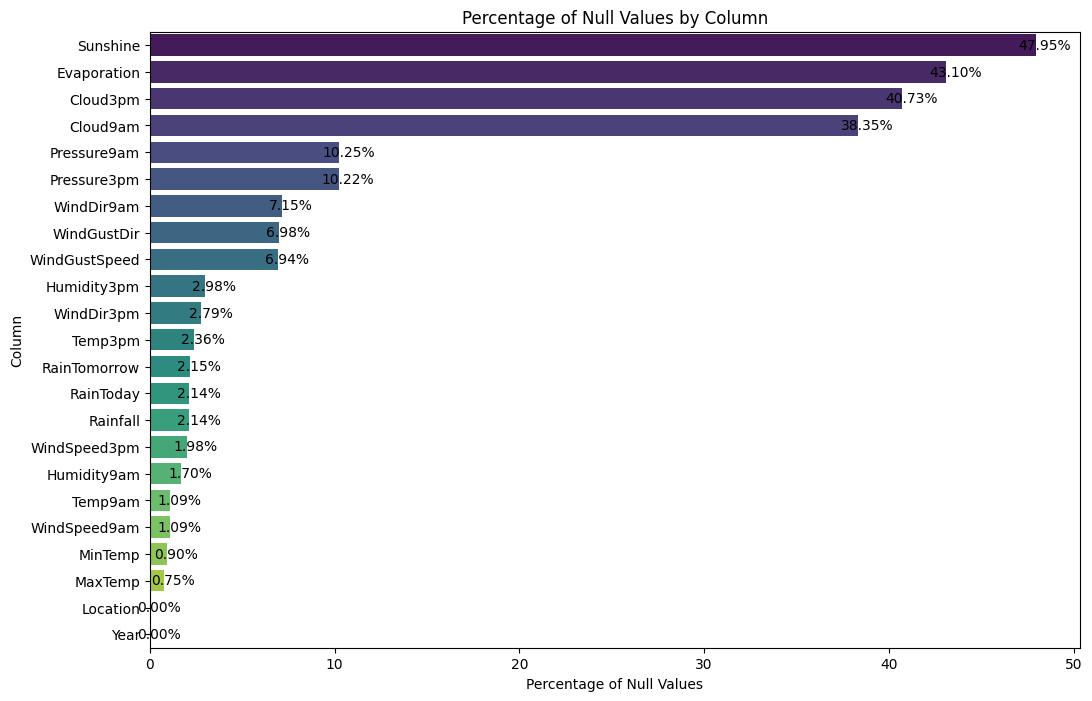

In [ ]:
null_percentage = df.isnull().mean() * 100


null_percentage_df = pd.DataFrame({
    'Column': null_percentage.index,
    'Null Percentage': null_percentage.values
})


null_percentage_df = null_percentage_df.sort_values(by='Null Percentage', ascending=False)


plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Null Percentage', y='Column', data=null_percentage_df, palette='viridis')


for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}%',
                (p.get_width() + 0.5, p.get_y() + p.get_height() / 2),
                ha='center', va='center',
                fontsize=10, color='black')

plt.title('Percentage of Null Values by Column')
plt.xlabel('Percentage of Null Values')
plt.ylabel('Column')
plt.show()

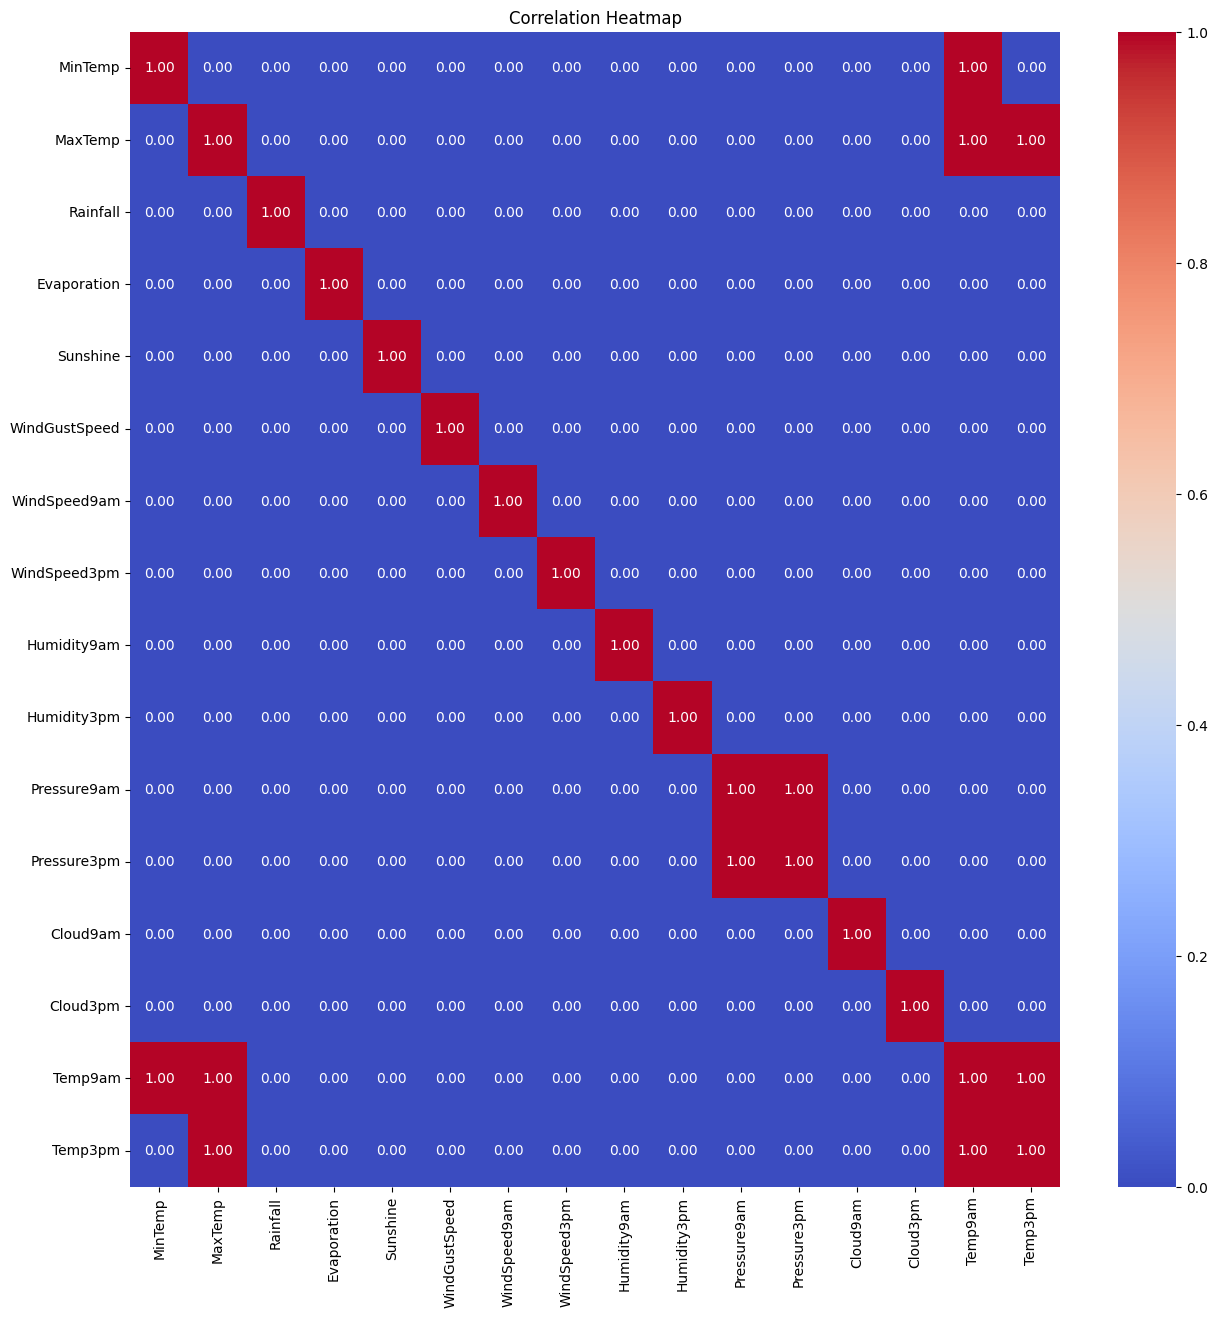

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr =df[numeric_cols].corr()

plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
sns.heatmap(corr>.8, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Feature Engineering

In [ ]:
df['Cloud'] =(df['Cloud3pm']+df['Cloud9am']) /2
df.drop(['Cloud3pm' ,'Cloud9am'] ,axis= 1 ,inplace=True )
df['Cloud'].isna().sum()

63323

In [ ]:
df['Pressure'] =(df['Pressure3pm'] + df['Pressure9am']) /2
df.drop(['Pressure3pm' ,'Pressure9am'] ,axis= 1 ,inplace=True )
df['Pressure'].head()

,Pressure
0,1007.40
1,1009.20
2,1008.15
3,1015.20
4,1008.40


In [ ]:
df['tempreture'] =(df['MaxTemp'] +df['MinTemp']) /2
df.drop(['MaxTemp' ,'MinTemp'] ,axis=1 ,inplace=True)
df['tempreture'].head()

,tempreture
0,18.15
1,16.25
2,19.30
3,18.60
4,24.90


In [ ]:
df['temp9_3'] =(df['Temp9am'] +df['Temp3pm']) /2
df.drop(['Temp9am' ,'Temp3pm'] ,axis=1 ,inplace=True)
df['temp9_3'].head()

,temp9_3
0,19.35
1,20.75
2,22.10
3,22.30
4,23.75


In [ ]:
df['RainTomorrow'].isna().sum()

3120

In [ ]:
df.dropna(subset=['RainTomorrow'], inplace=True)

In [ ]:
df.shape

(142161, 19)

Remove rows that contain geater than 9 null values

In [ ]:
x =df[df.isna().sum(axis=1) >= 10]
len(x)

1578

In [ ]:
df = df[df.isna().sum(axis=1) < 10]
print(len(df))


#df = df.dropna(thresh=len(df.columns) - 10)
# Optionally, reset the index after dropping rows
#df.reset_index(drop=True, inplace=True)


140583


predict null valus using linear regression model

this model will use **linear regression** to predict numerical null values ,and **Logistic Regression** to predict categorical values

In [ ]:
def remove_null(df):
    models = {}

    for column_name in df.columns:
        if df[column_name].isnull().any():
            print(f"Processing column: {column_name}")

            # Separate training and testing data
            train_data = df[df[column_name].notnull()]
            test_data = df[df[column_name].isnull()]

            if train_data.empty:
                print(f"No training data available for {column_name}. Filling with default value.")
                continue

            if test_data.empty:
                print(f"No test data available for {column_name}.")
                continue

            # Define features and target
            X_train = train_data.drop([column_name], axis=1)
            y_train = train_data[column_name]

            # Identify categorical and numerical columns
            categorical_cols = X_train.select_dtypes(include=['object']).columns
            numerical_cols = X_train.select_dtypes(include=['number']).columns

            # Preprocessing pipelines
            numeric_transformer = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='mean')),
                ('scaler', StandardScaler())
            ])

            categorical_transformer = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))
            ])

            preprocessor = ColumnTransformer(
                transformers=[
                    ('num', numeric_transformer, numerical_cols),
                    ('cat', categorical_transformer, categorical_cols)
                ]
            )

            # Model selection based on target type
            if pd.api.types.is_numeric_dtype(y_train):
                model = Pipeline(steps=[
                    ('preprocessor', preprocessor),
                    ('regressor', LinearRegression())
                ])
            else:
                model = Pipeline(steps=[
                    ('preprocessor', preprocessor),
                    ('classifier', LogisticRegression(max_iter=1000))
                ])

            # Fit the model
            model.fit(X_train, y_train)

            # Store the model and preprocessor
            models[column_name] = model

            # Predict and fill missing values in the original DataFrame
            if not test_data.empty:
                X_test = test_data.drop([column_name], axis=1)
                predicted_values = model.predict(X_test)
                df.loc[df[column_name].isnull(), column_name] = predicted_values

    # Save all models in a single file
    joblib.dump(models, "all_models.pkl")

# Run the function to save all models and fill missing values
remove_null(df)

Processing column: Rainfall
Processing column: Evaporation
Processing column: Sunshine
Processing column: WindGustDir
Processing column: WindGustSpeed
Processing column: WindDir9am
Processing column: WindDir3pm
Processing column: WindSpeed9am
Processing column: WindSpeed3pm
Processing column: Humidity9am
Processing column: Humidity3pm
Processing column: RainToday
Processing column: Cloud
Processing column: Pressure
Processing column: tempreture
Processing column: temp9_3


In [ ]:
df.isna().sum()

,0
Location,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0
WindDir3pm,0
WindSpeed9am,0
WindSpeed3pm,0


##Outliers

In [ ]:
df.columns

Index(['Location', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'RainToday',
       'RainTomorrow', 'Year', 'Cloud', 'Pressure', 'tempreture', 'temp9_3'],
      dtype='object')

In [ ]:
new_col =[ 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
        'Cloud', 'Pressure']


for col in new_col:
    df[col] = df[col].apply(lambda x: abs(x) if x < 0 else x)

df[col].head()

,Pressure
0,1007.40
1,1009.20
2,1008.15
3,1015.20
4,1008.40


In [ ]:
num_col =df.select_dtypes(include='number').columns

In [ ]:
columns =df.columns
columns

Index(['Location', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'RainToday',
       'RainTomorrow', 'Year', 'Cloud', 'Pressure', 'tempreture', 'temp9_3'],
      dtype='object')

RobustScaler transformation

In [ ]:
R_scaler  = RobustScaler()

df[num_col] = R_scaler.fit_transform(df[num_col])

joblib.dump(R_scaler, 'R_scaler.joblib')

['R_scaler.joblib']

heatmape

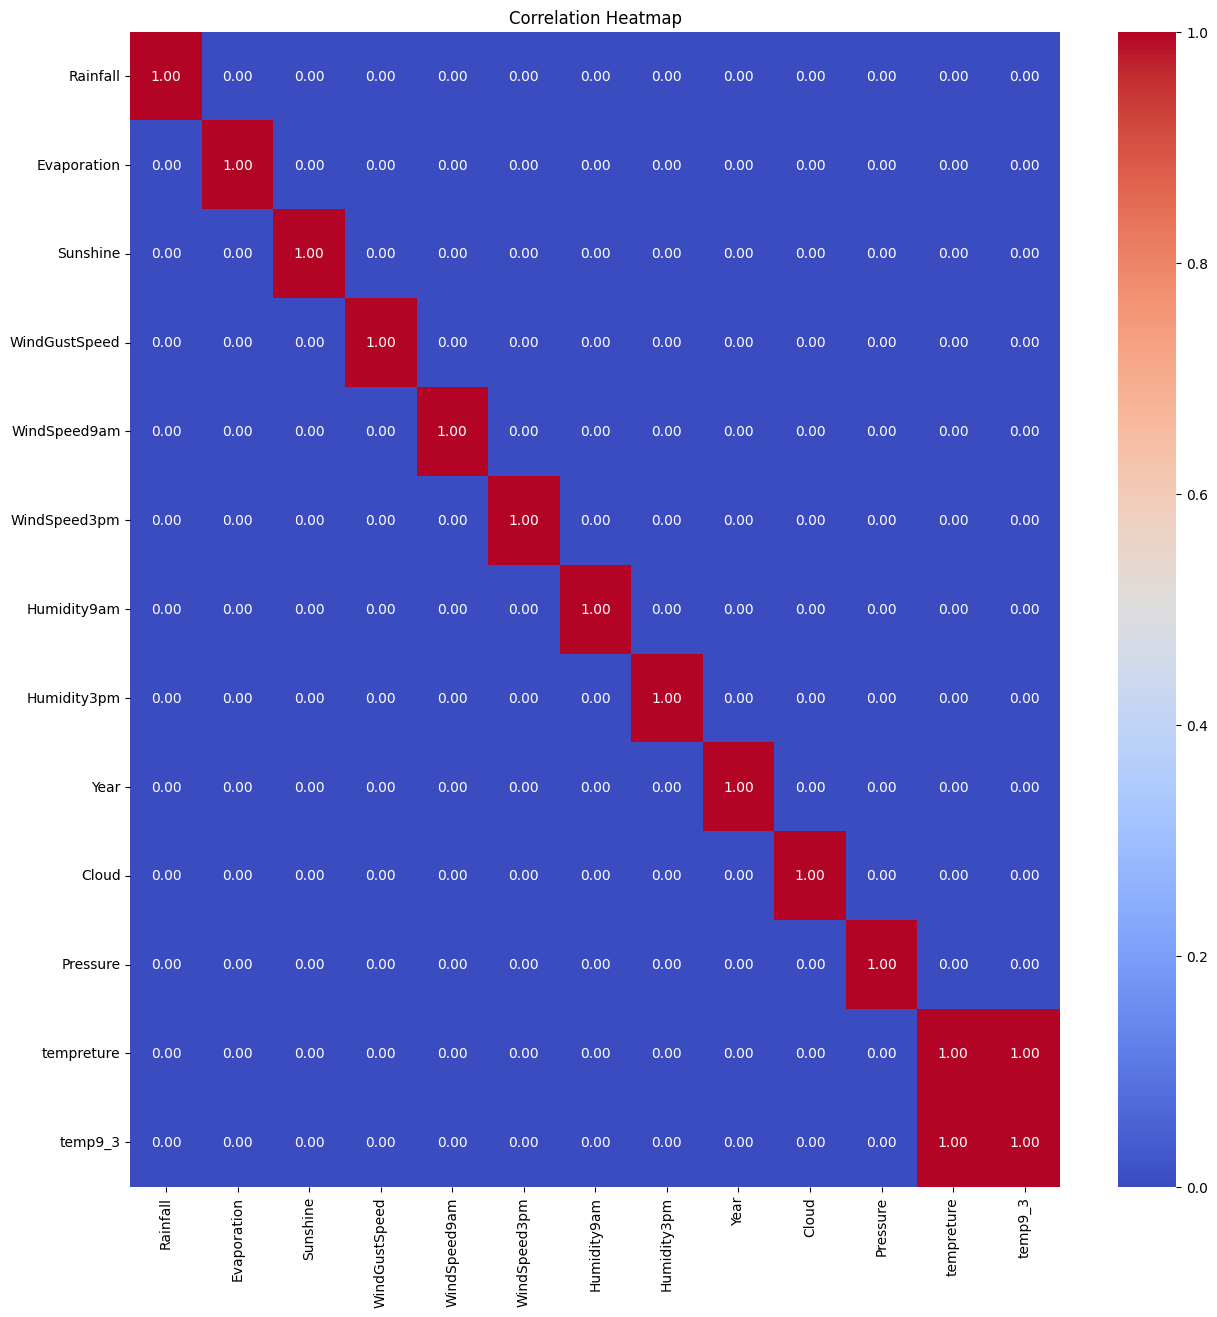

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr =df[numeric_cols].corr()

plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
sns.heatmap(corr>.8, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df.drop('temp9_3' ,axis=1 ,inplace=True)

In [ ]:
df.columns

Index(['Location', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'RainToday',
       'RainTomorrow', 'Year', 'Cloud', 'Pressure', 'tempreture'],
      dtype='object')

##Encoding

In [ ]:
catigorical_col = df.select_dtypes(include=['O']).columns

for cl in catigorical_col:
  print(cl)
  print(len(df[cl].unique()))

Location
49
WindGustDir
16
WindDir9am
16
WindDir3pm
16
RainToday
2
RainTomorrow
2


In [ ]:
df['RainTomorrow'].replace({'Yes':1 ,'No':0},inplace= True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
import joblib


label_encoders = {}
cols=[]

for col in df.select_dtypes(include='O').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    cols.append(col)
print(cols)

joblib.dump(label_encoders, 'label_encoders.pkl')


['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


['label_encoders.pkl']

In [ ]:
df.head()

,Location,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,RainToday,RainTomorrow,Year,Cloud,Pressure,tempreture
0,2,0.75,0.046351,0.408210,13,0.294118,13,14,0.583333,0.454545,0.038462,-1.034483,0,0,-1.25,-0.216811,-1.003827,0.080214
1,2,0.00,0.181764,0.484425,14,0.294118,6,15,-0.750000,0.272727,-1.000000,-0.931034,0,0,-1.25,-0.479592,-0.807106,-0.122995
2,2,0.00,0.675717,0.547438,15,0.411765,13,15,0.500000,0.636364,-1.230769,-0.758621,0,0,-1.25,-0.276894,-0.921860,0.203209
3,2,0.00,0.412816,0.525316,4,-0.882353,9,0,-0.166667,-0.909091,-0.961538,-1.241379,0,0,-1.25,-0.548731,-0.151368,0.128342
4,2,1.25,0.351452,-0.369939,13,0.117647,1,7,-0.500000,0.090909,0.461538,-0.655172,0,0,-1.25,1.090812,-0.894538,0.802139


In [ ]:
X_data =df.drop('RainTomorrow' ,axis=1)
y_data =df['RainTomorrow']

X_train ,X_test ,y_train ,y_test =train_test_split(X_data ,y_data ,test_size=.2 ,random_state= 42)

print('X_train :' ,X_train.shape)
print('X_test :' ,X_test.shape)
print('y_train :' ,y_train.shape)
print('y_test :' ,y_test.shape)


X_train : (112466, 18)
X_test : (28117, 18)
y_train : (112466,)
y_test : (28117,)


<Axes: ylabel='count'>

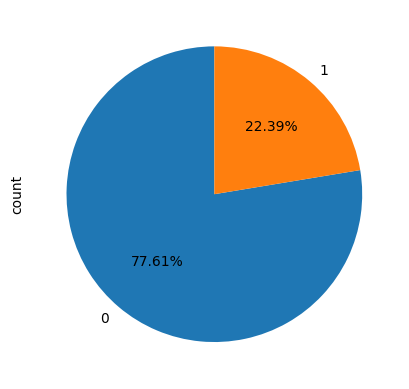

In [ ]:
y_data.value_counts().plot.pie(autopct='%2.2f%%', startangle=90)

In [ ]:
y_train.value_counts()

,count
RainTomorrow,
0,87358
1,25108


In [ ]:
from sklearn.ensemble import VotingClassifier

model1 = RandomForestClassifier(class_weight='balanced')
model2 = LogisticRegression(class_weight='balanced')
ensemble_model = VotingClassifier(estimators=[('rf', model1), ('lr', model2)], voting='soft')
ensemble_model.fit(X_train, y_train)

joblib.dump(ensemble_model, 'model.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['model.pkl']

In [ ]:
y_pred_train =ensemble_model.predict(X_train)
train_accuracy =accuracy_score(y_pred= y_pred_train ,y_true= y_train)
print('Train accuracy is :' ,train_accuracy)

Train accuracy is : 0.9491224014368786


In [ ]:
y_pred_test =ensemble_model.predict(X_test)
test_accuracy =accuracy_score(y_pred= y_pred_test  ,y_true= y_test)
print('Test accuracy is :' ,test_accuracy)

Test accuracy is : 0.8587331507628837


In [ ]:
print (classification_report(y_pred= y_pred_test ,y_true= y_test))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     21747
           1       0.68      0.70      0.69      6370

    accuracy                           0.86     28117
   macro avg       0.80      0.80      0.80     28117
weighted avg       0.86      0.86      0.86     28117



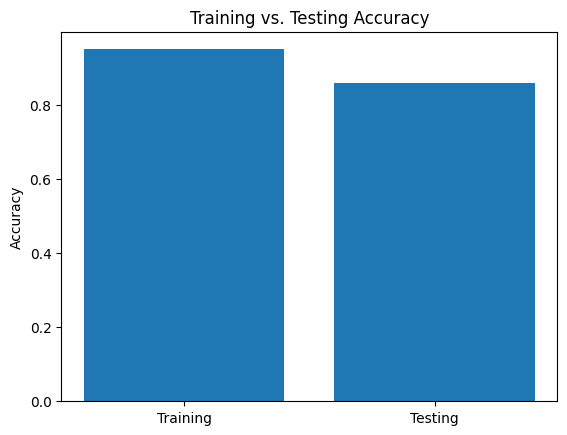

In [ ]:
plt.bar(['Training', 'Testing'], [train_accuracy, test_accuracy])
plt.ylabel('Accuracy')
plt.title('Training vs. Testing Accuracy')
plt.show()

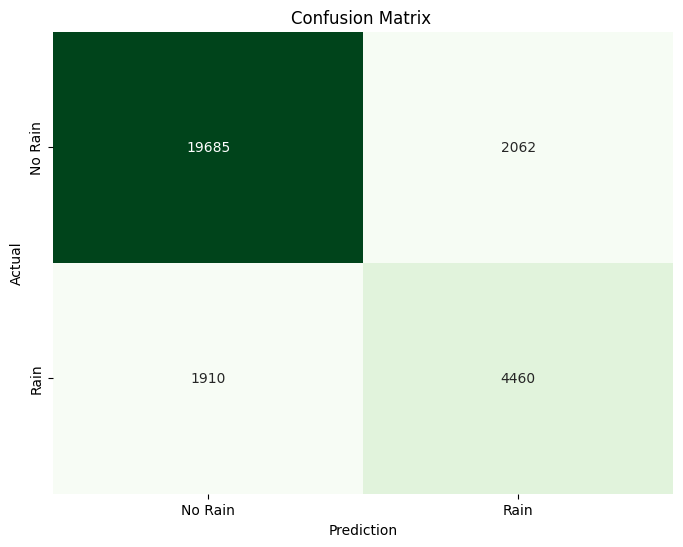

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = ensemble_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', cbar=False,
            xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix ')
plt.show()

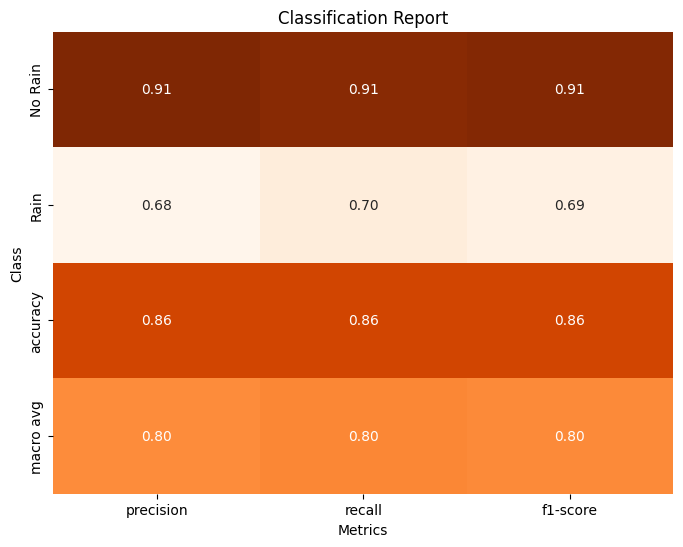

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report


report = classification_report(y_test, y_pred, target_names=['No Rain', 'Rain'], output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Oranges', fmt='.2f', cbar=False)
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.title('Classification Report' )
plt.show()


##NN

In [ ]:
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def NN(input_shape):
    inputs = tf.keras.layers.Input(shape=input_shape)
    x = tf.keras.layers.Dense(512, activation="relu", kernel_regularizer=l2(0.0001))(inputs)
    x = tf.keras.layers.Dense(256, activation="relu", kernel_regularizer=l2(0.0001))(x)
    x = tf.keras.layers.Dense(128, activation="relu", kernel_regularizer=l2(0.0001))(x)
    x = tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=l2(0.0001))(x)
    x = tf.keras.layers.Dense(32, activation="relu", kernel_regularizer=l2(0.0001))(x)
    x = tf.keras.layers.Dense(16, activation="relu", kernel_regularizer=l2(0.0001))(x)
    output = tf.keras.layers.Dense(1, activation="sigmoid")(x)

    NN_model = tf.keras.Model(inputs=inputs, outputs=output)
    return NN_model

# Define model
input_shape = (X_train.shape[1],)
NN_model = NN(input_shape)

# Compile the model
NN_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Early stopping with increased patience and learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Train the model
NN_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping, lr_scheduler])

Epoch 1/50
3515/3515 ━━━━━━━━━━━━━━━━━━━━ 31s 8ms/step - accuracy: 0.8170 - loss: 0.4586 - val_accuracy: 0.8489 - val_loss: 0.3886 - learning_rate: 1.0000e-04
Epoch 2/50
3515/3515 ━━━━━━━━━━━━━━━━━━━━ 44s 9ms/step - accuracy: 0.8480 - loss: 0.3883 - val_accuracy: 0.8481 - val_loss: 0.3826 - learning_rate: 1.0000e-04
Epoch 3/50
3515/3515 ━━━━━━━━━━━━━━━━━━━━ 39s 8ms/step - accuracy: 0.8476 - loss: 0.3789 - val_accuracy: 0.8518 - val_loss: 0.3699 - learning_rate: 1.0000e-04
Epoch 4/50
3515/3515 ━━━━━━━━━━━━━━━━━━━━ 28s 8ms/step - accuracy: 0.8524 - loss: 0.3674 - val_accuracy: 0.8506 - val_loss: 0.3666 - learning_rate: 1.0000e-04
Epoch 5/50
3515/3515 ━━━━━━━━━━━━━━━━━━━━ 43s 9ms/step - accuracy: 0.8550 - loss: 0.3603 - val_accuracy: 0.8539 - val_loss: 0.3599 - learning_rate: 1.0000e-04
Epoch 6/50
3515/3515 ━━━━━━━━━━━━━━━━━━━━ 28s 8ms/step - accuracy: 0.8543 - loss: 0.3580 - val_accuracy: 0.8539 - val_loss: 0.3587 - learning_rate: 1.0000e-04
Epoch 7/50
3515/3515 ━━━━━━━━━━━━━━━━━━━━ 40s 

In [ ]:
joblib.dump(NN_model ,'NN_model.pkl')

['NN_model.pkl']

879/879 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


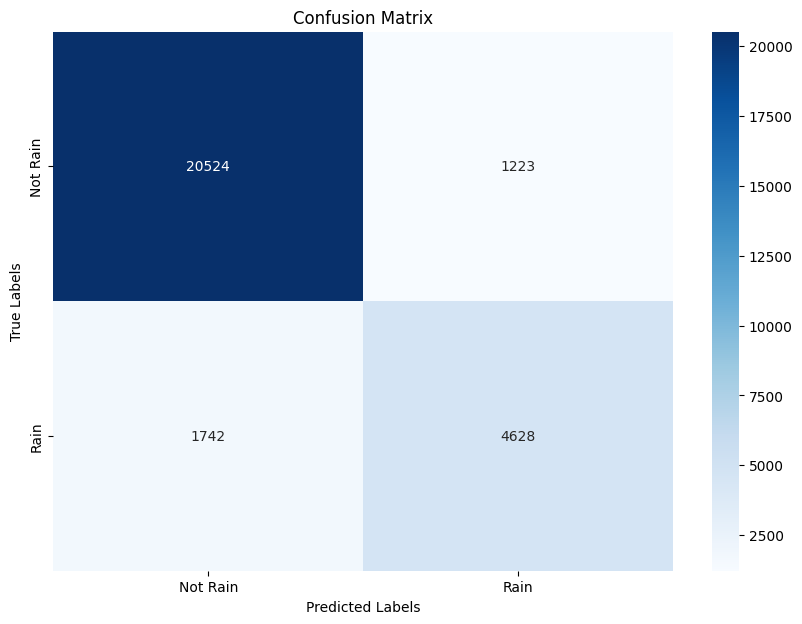

In [ ]:
y_pred_probs = NN_model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Rain', 'Rain'],
            yticklabels=['Not Rain', 'Rain'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
y_pred_probs = NN_model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Print classification report
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
print(report)

879/879 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
              precision    recall  f1-score   support

     Class 0       0.92      0.94      0.93     21747
     Class 1       0.79      0.73      0.76      6370

    accuracy                           0.89     28117
   macro avg       0.86      0.84      0.85     28117
weighted avg       0.89      0.89      0.89     28117



879/879 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


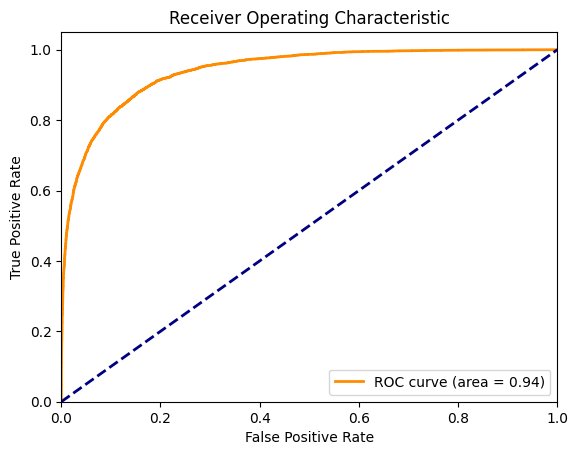

In [ ]:
y_pred_probs = NN_model.predict(X_test).ravel()

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Deployment

In [ ]:
def preprocessing (df):

  #replace Data column with year column
  df['Date'] = pd.to_datetime(df['Date'])
  df['Year'] = df['Date'].dt.year
  df.drop('Date' ,axis=1 ,inplace =True)

  #remove duplication
  df.drop_duplicates(inplace=True)

  #feature engineering
  df['Cloud'] =(df['Cloud3pm']+df['Cloud9am']) /2
  df.drop(['Cloud3pm' ,'Cloud9am'] ,axis= 1 ,inplace=True )

  df['Pressure'] =(df['Pressure3pm'] + df['Pressure9am']) /2
  df.drop(['Pressure3pm' ,'Pressure9am'] ,axis= 1 ,inplace=True )

  df['tempreture'] =(df['MaxTemp'] +df['MinTemp']) /2
  df.drop(['MaxTemp' ,'MinTemp'] ,axis=1 ,inplace=True)

  df['temp9_3'] =(df['Temp9am'] +df['Temp3pm']) /2
  df.drop(['Temp9am' ,'Temp3pm'] ,axis=1 ,inplace=True)


  #drop null values in target column
  df.dropna(subset=['RainTomorrow'], inplace=True)

  #remove rows that contain 10 null values or more
  df = df[df.isna().sum(axis=1) < 10]


  #fill null values
  def predict_null(new_data):
    # Load all models
    models = joblib.load("all_models.pkl")

    for column_name, model in models.items():
        # Identify rows with missing values
        missing_data = new_data[new_data[column_name].isnull()]
        if missing_data.empty:
            continue

        # Separate features
        X_missing = missing_data.drop([column_name], axis=1)

        # Predict missing values
        predicted_values = model.predict(X_missing)

        # Fill in the missing values in the original DataFrame
        new_data.loc[new_data[column_name].isnull(), column_name] = predicted_values

    return new_data

  df = predict_null(df)

  pos_col =[ 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
        'Cloud', 'Pressure']

  # make some colum positive
  for col in pos_col:
      df[col] = df[col].apply(lambda x: abs(x) if x < 0 else x)


  num_col =df.select_dtypes(include='number').columns

  #scaling
  scaler = joblib.load("R_scaler.joblib")
  df[num_col] = R_scaler.fit_transform(df[num_col])

  #drop temp9_3 column that have high correlation with tempreture
  df.drop('temp9_3' ,axis=1 ,inplace=True)

  df['RainTomorrow'].replace({'Yes':1 ,'No':0},inplace= True)




  #encoding
  def label_encoders(df):
    label_encoders = joblib.load('label_encoders.pkl')

    for col, le in label_encoders.items():
        if col in df.columns:
            df[col] = le.transform(df[col])

    return df

  df = label_encoders(df)


  X_data =df.drop('RainTomorrow' ,axis=1)
  y_data =df['RainTomorrow']


  return X_data, y_data


In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 89.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.8 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing in

In [ ]:
import gradio as gr
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler


def predict(file):

  def predict(file):
    try:
        print("Reading file...")
        df = pd.read_csv(file.name) if file.name.endswith('.csv') else pd.read_excel(file.name)
        print("Preprocessing data...")
        X_data, _ = preprocessing(df)
        print("Loading model...")
        NN_model = joblib.load('NN_model.pkl')
        print("Making predictions...")
        predictions = NN_model.predict(X_data)
        print("Saving results...")
        df['Predicted'] = predictions
        output_file = "predictions.csv"
        df.to_csv(output_file, index=False)
        print("Done.")
        return output_file
    except Exception as e:
        print(f"An error occurred: {e}")
        return str(e)



# Create the Gradio interface
iface = gr.Interface(
    fn=predict,
    inputs=gr.File(label="Upload your input Excel or CSV file"),
    outputs=gr.File(label="Download Predictions as CSV"),
    title="Weather Prediction App",
    description="Upload a file to get weather predictions."
)

if __name__ == "__main__":
    iface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://46dda32b5b586f3a84.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
def predict(file):
    try:
        # Read the file content
        file_content = file.read()  # Read the file as bytes
        if file.name.endswith('.csv'):
            df = pd.read_csv(io.StringIO(file_content.decode('utf-8')))
        elif file.name.endswith('.xlsx'):
            df = pd.read_excel(io.BytesIO(file_content))
        else:
            return "Unsupported file format"

        # Preprocess the data
        X_data, _ = preprocessing(df)

        # Make predictions
        predictions = NN_model.predict(X_data)
        df['Predicted'] = predictions

        # Prepare output
        output_file = io.BytesIO()
        df.to_csv(output_file, index=False)
        output_file.seek(0)

        return output_file, "text/csv"

    except Exception as e:
        import traceback
        error_message = f"An error occurred: {e}\n{traceback.format_exc()}"
        return error_message

# Create the Gradio interface
iface = gr.Interface(
    fn=predict,
    inputs=gr.File(label="Upload your input Excel or CSV file"),
    outputs=gr.File(label="Download Predictions as CSV"),
    title="Weather Prediction App",
    description="Upload a file to get weather predictions."
)

if __name__ == "__main__":
    iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://ccd6b4b029a15dde12.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
